In [1]:
import numpy as np
import pandas as pd
import sklearn.neighbors
import sklearn.linear_model

%matplotlib inline
import matplotlib.pyplot as plt

import os
import urllib

In [2]:
#Downloads the data from a website

datapath = os.path.join("datasets", "lifesat", "")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/coreyalmon/hands_on_ML_rep/master/src/"

os.makedirs(datapath, exist_ok = True) 

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    
    #Downloads files from github and puts them in the newly created directory
    urllib.request.urlretrieve(url, datapath + filename) 
    
print("\nFiles successfuly donwloaded!")
    


Files successfuly donwloaded!


In [11]:
#Loads the data

#thousands= reads the comma as part of a number
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')

#'\t' means tab. The data was written in latin1 encoding (prob from europe)
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")


oecd_bli.tail()


,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2363,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.54,NaN,NaN
2364,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,32.09,NaN,NaN
2365,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
2366,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN
2367,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,0.43,NaN,NaN


In [4]:
#Prepares the data

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]   
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp_per_capita.rename(columns={"2015":"GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                             left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    remove_indices=[0,1,6,8,33,34,35]
    keep_indices= list(set(range(36)) - set(remove_indices))   
    
    return full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]
    
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]              #Changes the data into column vectors
y = np.c_[country_stats["Life satisfaction"]]           #Changes the data into column vectors

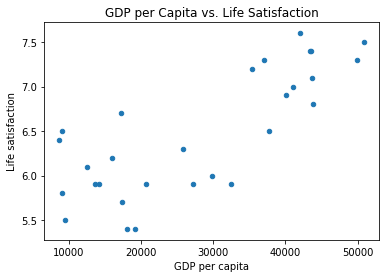

In [5]:
#Visualizes the data

#Plot image
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")  #Takes the columns in country_stats

#Decorate image
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.title("GDP per Capita vs. Life Satisfaction")

#save image
IMAGES_PATH = os.path.join("images","figures","")
os.makedirs(IMAGES_PATH, exist_ok=True)
plt.savefig(IMAGES_PATH + "/fig1.png")

In [6]:
#Selects a linear model
model = sklearn.linear_model.LinearRegression()

#Selects instance based model
#model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)


In [13]:
#Trains a linear model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#Makes a prediction

X_new = [[92121.4]]             #Cyprus' GDP per capita
model.predict(X_new)


array([[8.9594268]])